In [2]:
import pandas as pd
# Load the dataset
file_path = 'dataset/Listing_of_All_Businesses_20250202.csv'
df = pd.read_csv(file_path)

In [3]:
# Check for missing values in the NAICS column
missing_naics = df['NAICS'].isnull().sum()
print(f"Number of rows missing NAICS data: {missing_naics}")

missing_location = df['LOCATION'].isnull().sum()
print(f"Number of rows missing LOCATION data: {missing_location}")

Number of rows missing NAICS data: 968578
Number of rows missing LOCATION data: 922721


In [4]:
# Drop rows where the NAICS column is missing
df_cleaned = df.dropna(subset=['NAICS', 'LOCATION'])

# Verify that the rows have been dropped
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after dropping missing NAICS data: {len(df_cleaned)}")

Original number of rows: 1593026
Number of rows after dropping missing NAICS data: 584508


In [7]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'dataset/Listing_of_All_Businesses_Cleaned_20250202.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")

Cleaned dataset saved to: dataset/Listing_of_All_Businesses_Cleaned_20250202.csv


In [9]:
import pandas as pd

# Load the dataset
file_path = 'dataset/Listing_of_All_Businesses_Cleaned_20250202.csv'
df_all_businesses = pd.read_csv(file_path)

# Count businesses by city
top_cities_businesses = df_all_businesses['CITY'].value_counts().head(5).reset_index()
top_cities_businesses.columns = ['City', 'Total_Businesses']

# Display the results
print("Top 5 Cities with the Most Businesses:")
display(top_cities_businesses)


Top 5 Cities with the Most Businesses:


,City,Total_Businesses
0,LOS ANGELES,286663
1,VAN NUYS,21295
2,NORTH HOLLYWOOD,17242
3,SHERMAN OAKS,15165
4,WOODLAND HILLS,13194


In [11]:

# Load the dataset
file_path = 'dataset/Listing_of_All_Businesses_Cleaned_20250202.csv'
df = pd.read_csv(file_path)

# Convert 'LOCATION START DATE' and 'LOCATION END DATE' to datetime
df['LOCATION START DATE'] = pd.to_datetime(df['LOCATION START DATE'], errors='coerce')
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Find the earliest open business
earliest_business = df.loc[df['LOCATION START DATE'].idxmin()]

# Find the latest open business
latest_business = df.loc[df['LOCATION START DATE'].idxmax()]

# Display the results
print("Earliest Open Business:")
print(earliest_business[['BUSINESS NAME', 'LOCATION START DATE', 'STREET ADDRESS', 'CITY', 'ZIP CODE']])

print("\nLatest Open Business:")
print(latest_business[['BUSINESS NAME', 'LOCATION START DATE', 'STREET ADDRESS', 'CITY', 'ZIP CODE']])

Earliest Open Business:
BUSINESS NAME          A & A BUILDING MATERIAL CO
LOCATION START DATE           1921-01-01 00:00:00
STREET ADDRESS           310 N SANTA ANITA AVENUE
CITY                                      ARCADIA
ZIP CODE                               91006-2841
Name: 115031, dtype: object

Latest Open Business:
BUSINESS NAME                BRISTOL FARMS
LOCATION START DATE    2025-06-01 00:00:00
STREET ADDRESS           6220 SELMA AVENUE
CITY                           LOS ANGELES
ZIP CODE                        90028-2006
Name: 556457, dtype: object


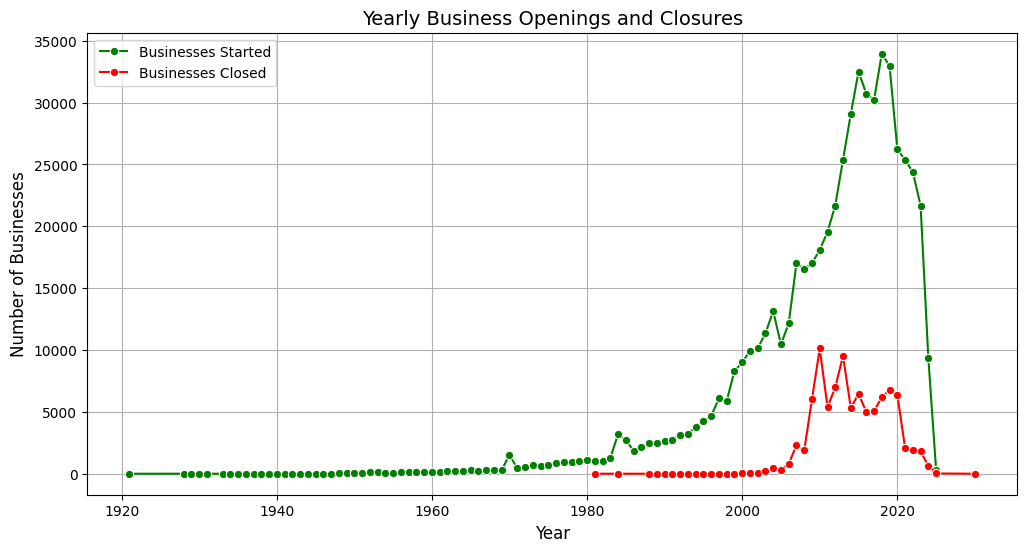

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Listing_of_All_Businesses_Cleaned_20250202.csv'
df = pd.read_csv(file_path)

# Convert dates to datetime format
df['LOCATION START DATE'] = pd.to_datetime(df['LOCATION START DATE'], errors='coerce')
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Extract years
df['Start_Year'] = df['LOCATION START DATE'].dt.year
df['End_Year'] = df['LOCATION END DATE'].dt.year

# Count businesses started and closed per year
start_counts = df['Start_Year'].value_counts().sort_index()
end_counts = df['End_Year'].value_counts().sort_index()

# Create a plot
plt.figure(figsize=(12, 6))

# Plot business starts
sns.lineplot(x=start_counts.index, y=start_counts.values, marker='o', label='Businesses Started', color='green')

# Plot business closures
sns.lineplot(x=end_counts.index, y=end_counts.values, marker='o', label='Businesses Closed', color='red')

# Formatting
plt.title("Yearly Business Openings and Closures", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Businesses", fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Closed Rate for Los Angeles, San Francisco, San Jose, New York and Chicago:
            CITY  close_rate
0        CHICAGO    0.108844
1    LOS ANGELES    0.176019
2       NEW YORK    0.101266
3  SAN FRANCISCO    0.100671
4       SAN JOSE    0.121495


<ipython-input-73-4b41dbe01c40>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




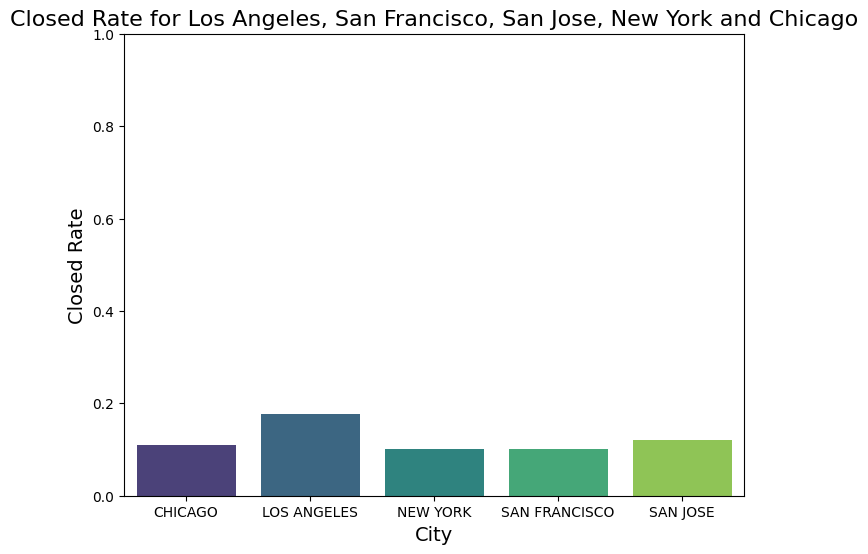

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = '/content/Listing_of_All_Businesses_Cleaned_20250202.csv'
df = pd.read_csv(file_path)

df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Filter data for Los Angeles, San Francisco, and San Jose
cities_of_interest = ['LOS ANGELES', 'SAN FRANCISCO', 'SAN JOSE', 'NEW YORK', 'CHICAGO']
filtered_df = df[df['CITY'].isin(cities_of_interest)]

# Group by city and calculate the total number of businesses and opened businesses
city_stats = filtered_df.groupby('CITY').agg(
    total_businesses=('BUSINESS NAME', 'count'),  # Total number of businesses
    closed_businesses=('LOCATION END DATE', 'count')  # Number of businesses with a start date
).reset_index()

# Calculate open rate
city_stats['close_rate'] = city_stats['closed_businesses'] / city_stats['total_businesses']

# Display the results
print("Closed Rate for Los Angeles, San Francisco, San Jose, New York and Chicago:")
print(city_stats[['CITY', 'close_rate']])


# Plot the closed rates using a histogram
plt.figure(figsize=(8, 6))
sns.barplot(x='CITY', y='close_rate', data=city_stats, palette='viridis')
plt.title('Closed Rate for Los Angeles, San Francisco, San Jose, New York and Chicago', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Closed Rate', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for rates
plt.show()

In [20]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = 'dataset/Listing_of_All_Businesses_Cleaned_20250202.csv'
df = pd.read_csv(file_path)

# Convert 'LOCATION END DATE' to datetime to identify closed businesses
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Extract latitude & longitude from 'LOCATION' column
df[['latitude', 'longitude']] = df['LOCATION'].str.strip('()').str.split(', ', expand=True).astype(float)

# Create a 'Closed' column (1 if closed, 0 if still open)
df['Closed'] = df['LOCATION END DATE'].notnull().astype(int)

# Remove points outside the continental U.S.
df = df[(df['latitude'].between(24, 50)) & (df['longitude'].between(-125, -66))]

# Calculate closed business rate per city
city_stats = df.groupby('CITY').agg(
    total_businesses=('BUSINESS NAME', 'count'),
    closed_businesses=('LOCATION END DATE', 'count')
).reset_index()

# Calculate closure rate
city_stats['close_rate'] = city_stats['closed_businesses'] / city_stats['total_businesses']

# Remove cities where the closed rate is exactly 0 or 1
city_stats = city_stats[(city_stats['close_rate'] > 0) & (city_stats['close_rate'] < 1)]

# Merge back to get latitude & longitude for plotting
df_city_locations = df.groupby('CITY')[['latitude', 'longitude']].mean().reset_index()
city_stats = city_stats.merge(df_city_locations, on="CITY")

# Plot using scatter_map (new API)
fig = px.scatter_map(
    city_stats,
    lat="latitude",
    lon="longitude",
    size="close_rate",       # Bubble size represents closure rate
    color="close_rate",      # Color indicates closure rate
    hover_name="CITY",
    hover_data={"close_rate": ":.2f"},
    color_continuous_scale="reds",
    size_max=20,
    title="Closed Business Rate Across U.S. Cities (Filtered)"
)

# Update map layout by specifying map properties in the "map" dictionary
fig.update_layout(
    map=dict(
        style="carto-positron",
        center=dict(lat=37.5, lon=-97),  # Centered over the U.S.
        zoom=3
    ),
    margin={"r":0, "t":40, "l":0, "b":0}
)

# Show the map
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

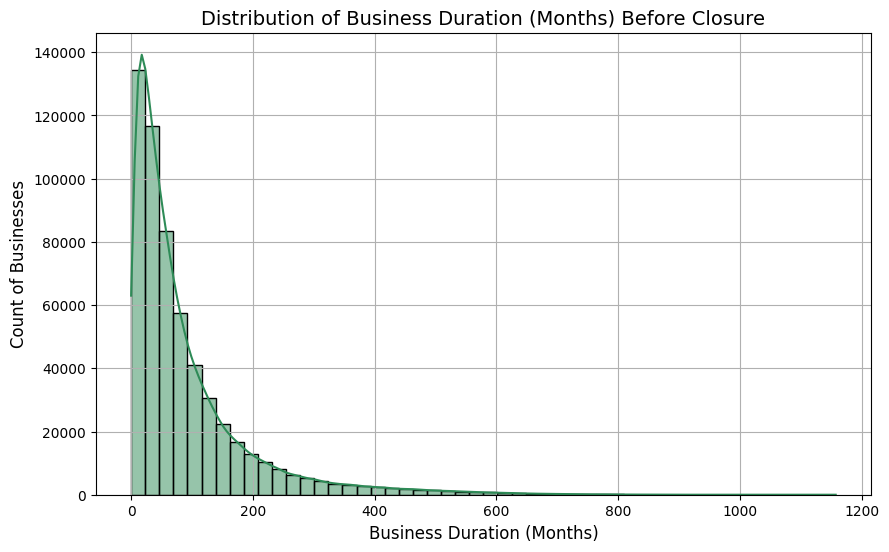

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/All_Closed_Businesses_20250202.csv'
df = pd.read_csv(file_path)

# Convert dates to datetime format
df['LOCATION START DATE'] = pd.to_datetime(df['LOCATION START DATE'], errors='coerce')
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce')

# Calculate business duration in months
df['business_duration_months'] = (df['LOCATION END DATE'] - df['LOCATION START DATE']).dt.days / 30.44  # Approximate months

# Drop invalid durations (negative values)
df = df[df['business_duration_months'] > 0]

# Plot histogram for business duration in months
plt.figure(figsize=(10, 6))
sns.histplot(df['business_duration_months'], bins=50, kde=True, color="seagreen")

# Formatting
plt.title("Distribution of Business Duration (Months) Before Closure", fontsize=14)
plt.xlabel("Business Duration (Months)", fontsize=12)
plt.ylabel("Count of Businesses", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
# Load the dataset
file_path = '/content/All_Closed_Businesses_20250202.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


# Drop rows where the NAICS column is missing
df_cleaned = df.dropna(subset=['NAICS'])

# Verify that the rows have been dropped
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after dropping missing NAICS data: {len(df_cleaned)}")


# Save the cleaned dataset to a new CSV file
cleaned_file_path = '/content/All_Closed_Businesses_Cleaned_20250202.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")

Original number of rows: 578210
Number of rows after dropping missing NAICS data: 88743
Cleaned dataset saved to: /content/All_Closed_Businesses_Cleaned_20250202.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned closed businesses dataset
closed_businesses_path = "/content/All_Closed_Businesses_Cleaned_20250202.csv"
df_closed = pd.read_csv(closed_businesses_path)

# Load the NAICS sector titles dataset
naics_sector_path = "/content/naics_dict.csv"  # Update with correct path
df_sectors = pd.read_csv(naics_sector_path)

# Count closed businesses by city
top_cities = df_closed['CITY'].value_counts().head(10).reset_index()
top_cities.columns = ['City', 'Closed_Businesses']

# Display the results
print("Top 10 Cities with the Most Closed Businesses:")
display(top_cities)


Top 10 Cities with the Most Closed Businesses:


,City,Closed_Businesses
0,LOS ANGELES,48396
1,VAN NUYS,3369
2,NORTH HOLLYWOOD,2225
3,WOODLAND HILLS,1849
4,SHERMAN OAKS,1814
5,NORTHRIDGE,1495
6,CANOGA PARK,1329
7,ENCINO,1157
8,RESEDA,1032
9,STUDIO CITY,975


Total Closed Businesses in LOS ANGELES: 48396


<ipython-input-78-14e3efbdb6b0>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-14e3efbdb6b0>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




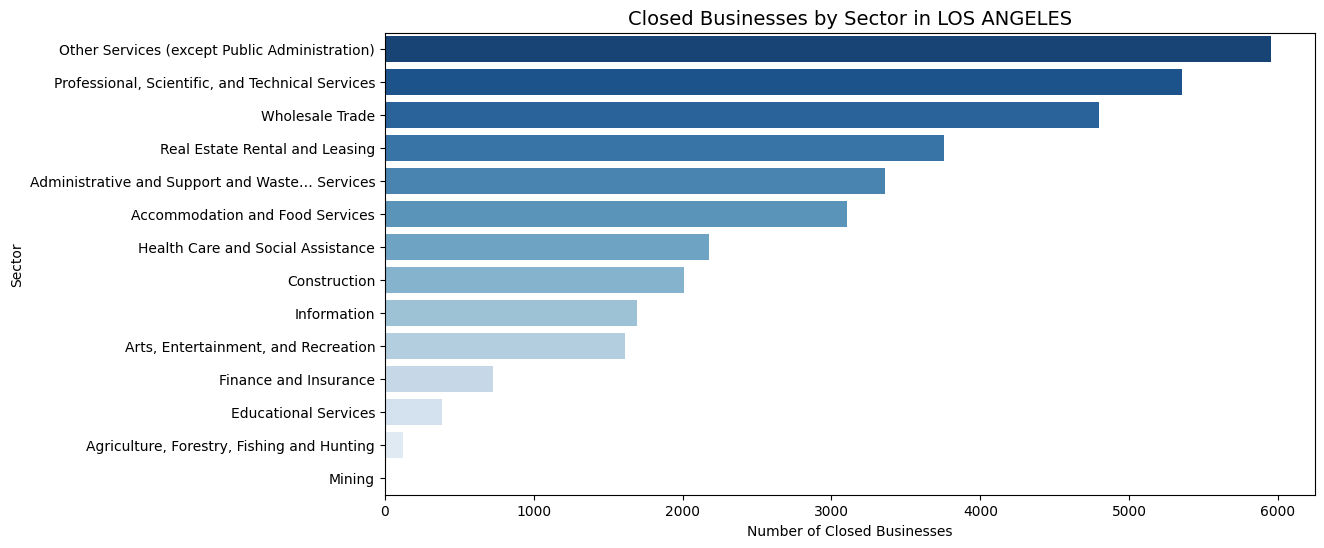

<ipython-input-78-14e3efbdb6b0>:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




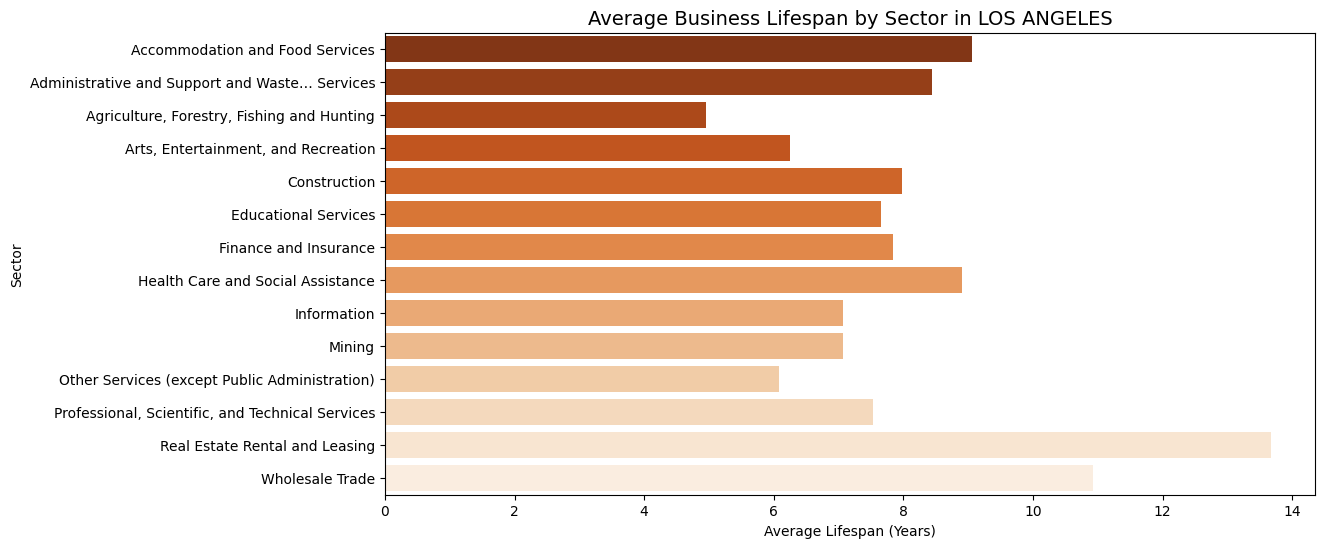

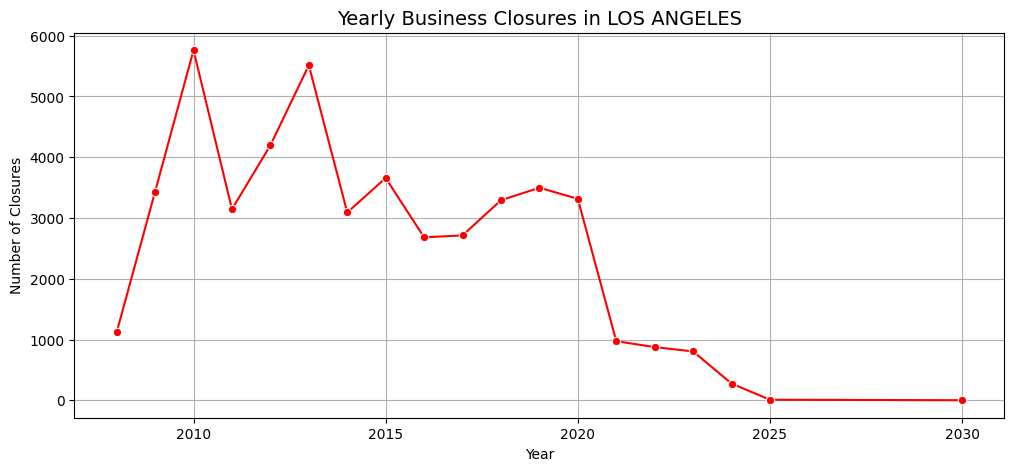

In [ ]:


# Filter data for LOS ANGELES
df_sj = df_closed[df_closed['CITY'].str.upper() == "LOS ANGELES"]

# Count the number of closed businesses in LOS ANGELES
closed_businesses_sj = df_sj.shape[0]

print(f"Total Closed Businesses in LOS ANGELES: {closed_businesses_sj}")


# Extract the first two digits of NAICS and merge with sector titles
df_sj['NAICS_Sector_Code'] = df_sj['NAICS'].astype(str).str[:2]
df_sj = df_sj.merge(df_sectors, left_on="NAICS_Sector_Code", right_on="Code", how="left")

# Convert dates to datetime format
df_sj['LOCATION START DATE'] = pd.to_datetime(df_sj['LOCATION START DATE'], errors='coerce')
df_sj['LOCATION END DATE'] = pd.to_datetime(df_sj['LOCATION END DATE'], errors='coerce')

# Calculate business duration in years
df_sj['business_duration_years'] = (df_sj['LOCATION END DATE'] - df_sj['LOCATION START DATE']).dt.days / 365.25
df_sj = df_sj[df_sj['business_duration_years'] > 0]  # Remove invalid data

# 1️⃣ Plot business closures by sector
sector_counts = df_sj['Sector_Title'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Closed_Businesses']

plt.figure(figsize=(12, 6))
sns.barplot(y=sector_counts['Sector'], x=sector_counts['Closed_Businesses'], palette="Blues_r")
plt.title("Closed Businesses by Sector in LOS ANGELES", fontsize=14)
plt.xlabel("Number of Closed Businesses")
plt.ylabel("Sector")
plt.show()

# 2️⃣ Calculate average business lifespan per sector
sector_lifespans = df_sj.groupby('Sector_Title')['business_duration_years'].mean().reset_index()
sector_lifespans.columns = ['Sector', 'Avg_Lifespan_Years']

plt.figure(figsize=(12, 6))
sns.barplot(y=sector_lifespans['Sector'], x=sector_lifespans['Avg_Lifespan_Years'], palette="Oranges_r")
plt.title("Average Business Lifespan by Sector in LOS ANGELES", fontsize=14)
plt.xlabel("Average Lifespan (Years)")
plt.ylabel("Sector")
plt.show()

# 3️⃣ Plot closures over time
df_sj['Closure_Year'] = df_sj['LOCATION END DATE'].dt.year
yearly_closures = df_sj['Closure_Year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_closures.index, y=yearly_closures.values, marker='o', color="red")
plt.title("Yearly Business Closures in LOS ANGELES", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Closures")
plt.grid(True)
plt.show()